<a href="https://colab.research.google.com/github/imrealhelper/Linear-Algebra/blob/main/soft_ware_labs/ase3001_exercises_back_in_black.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Back in black

$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\C}{\mathbf{C}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
$$



__<div style="text-align: right"> ASE3001: Computational Experiments for Aerospace Engineering, Inha University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@inha.ac.kr) </div>_


- 사운드 샘플(`.wav` 파일)을 로드한다
- 음원이 어떤 음표(또는 코드)로 구성되어 있는지 확인한다.<br>
  : 주파수-음표 매칭 표는 구글 검색 등을 통해 찾을 수 있다. <br>
      https://en.wikipedia.org/wiki/Piano_key_frequencies

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from IPython.display import Audio



- wav file을 불러온다.
- 시간에 따른 음성 신호를 도시하고 sound clip을 재생한다.

- 불러온 데이터는 `data[0]` : samplling rate과 `data[1]` : time-series signal로 구성된다.
- requests 모듈이 import 되지 않는다면 셀에서 다음을 실행한다. <br>
```! pip install requests```

Download success


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


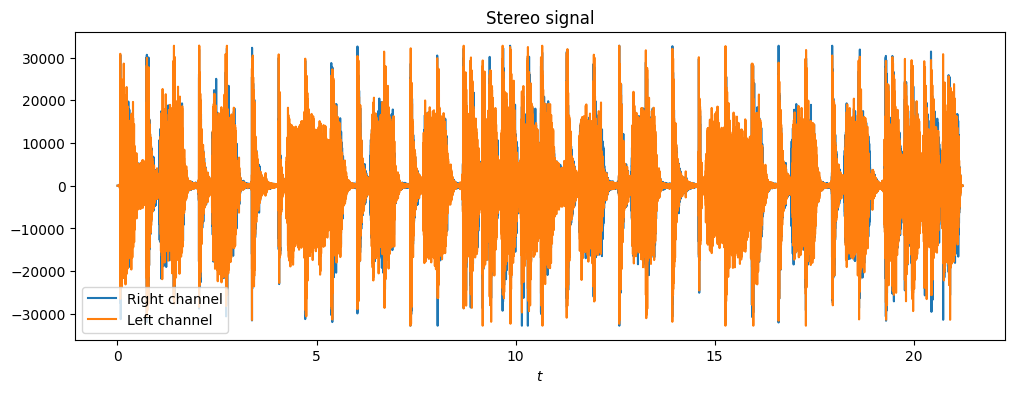

In [29]:
import requests

#URL로 부터 파일 받기 from https://jonghank.github.io/ase3001/files/back_in_black.wav
response = requests.get('https://jonghank.github.io/ase3001/files/back_in_black.wav')

local_file_path = './test.wav'
if response.status_code == 200:
    with open(local_file_path, 'wb') as file:
        file.write(response.content)
    print("Download success")
else:
    print("Download fail")


data = wavfile.read('./test.wav')

framerate = data[0]
sounddata = data[1]
t = np.arange(0,len(sounddata))/framerate

plt.figure(figsize=(12,4), dpi=100)
plt.plot(t,sounddata[:,0], label='Right channel')
plt.plot(t,sounddata[:,1], label='Left channel')
plt.xlabel(r'$t$')
plt.title('Stereo signal')
plt.legend()
plt.show()


Audio([sounddata[:,1], sounddata[:,0]], rate=framerate, autoplay=True)

- Right channel과 left channel로 구성된 데이터를 더해서 mono data 형성

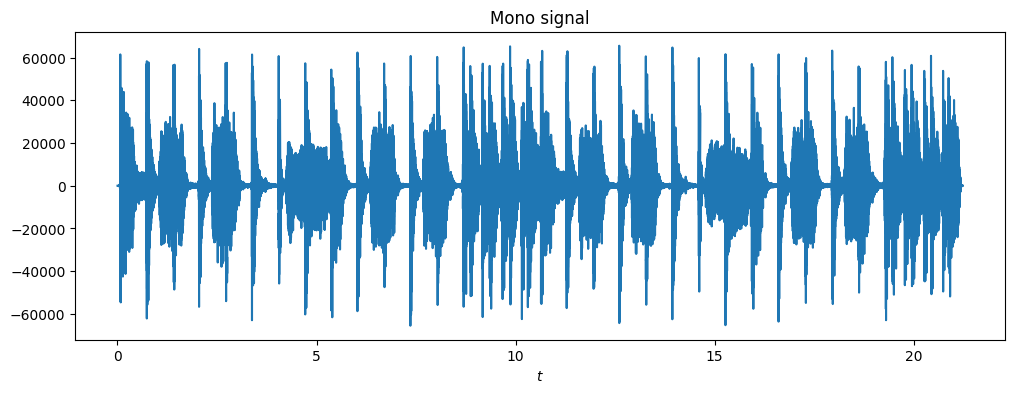

In [30]:
# sounddata: right channel과 left channel로 구성
# right channel과 left channel 더하기
mono = sounddata@[1,1]

plt.figure(figsize=(12,4), dpi=100)
plt.plot(t, mono)
plt.xlabel(r'$t$')
plt.title('Mono signal')
plt.show()

Audio(mono, rate=framerate, autoplay=True)

- 시간 구간 $0.1\le t \le 0.5$의 데이터를 추출하고 새로운 시계열 데이터 $x_1(t)$을 생성하시오.
- 푸리에 변환을 이용하여 지배적인 5개의 주파수와 그에 해당하는 음을 추출하고, 그 음들이 어떤 화음을 만드는지 확인하시오 [ by &nbsp; `np.fft()` ] .

365.98435272938684
365.98435272938684
{587.0099848463323: 33, 556.846733291757: 50, 538.0430047879233: 66, 365.98435272938684: 116, 416.39067766324837: 132}


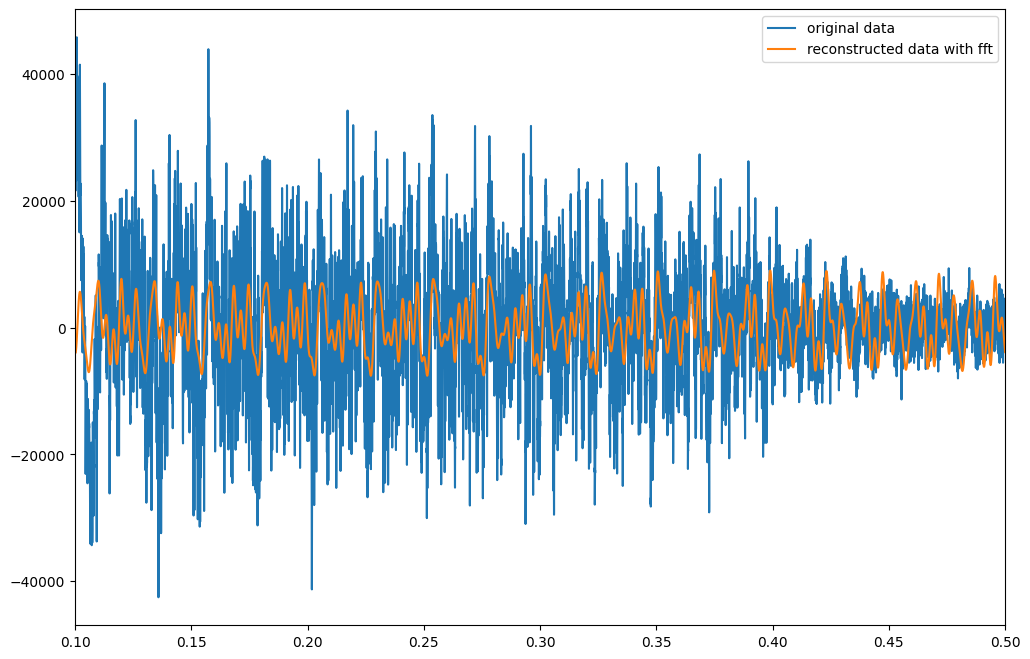

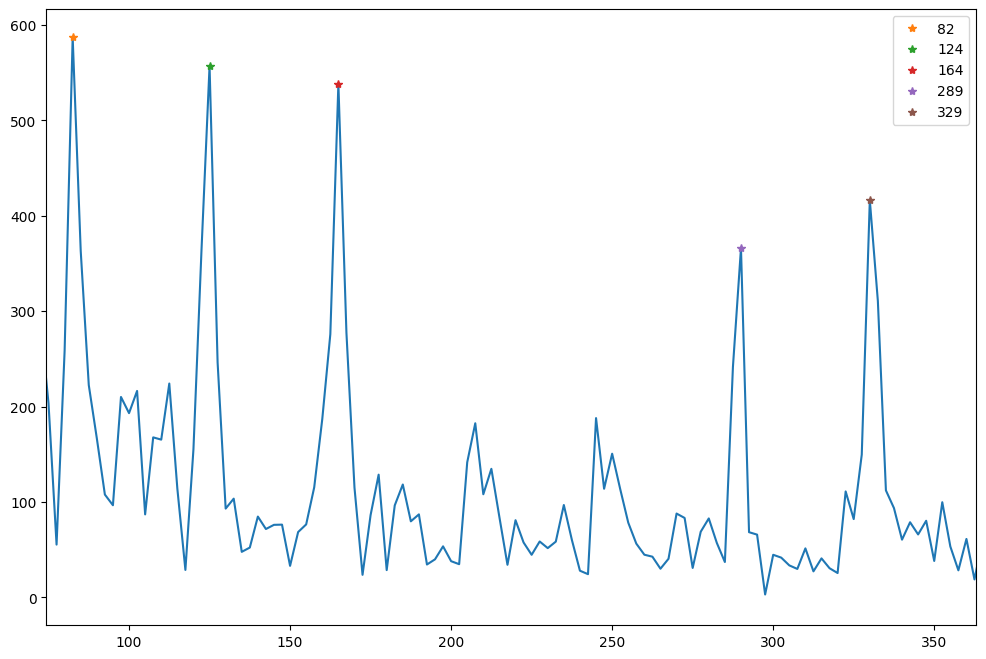

In [33]:
def fft_st_ed(start: float, end: float, mono, fs, dominant_num: int):
    x_1 = mono[int(start * fs):int(end * fs) + 1]
    N = len(x_1)
    df = fs / N
    f = np.arange(0, N) * df
    dt = 1 / fs
    X_1 = np.fft.fft(x_1) * dt
    X_1_rec = X_1[0:int(len(X_1) / 2) + 1]
    S = set(sorted(np.abs(X_1_rec.copy()), reverse=True)[:dominant_num])
    result = {}
    for i in range(len(np.abs(X_1_rec))):
        if np.abs(X_1_rec)[i] in S:
            result[np.abs(X_1_rec)[i]] = i


    min_in_max = sorted(result.items())[0][0]
    print(min_in_max)
    X_recon = X_1.copy()
    X_recon[np.abs(X_recon) < min_in_max] = 0
    x_recon = np.fft.ifft(X_recon).real * fs
    return x_1, x_recon, result, X_1, X_recon


def plot_fft_rec(x,x_recon,start,end,x_lim):
  plt.figure(figsize = (12,8))
  plt.plot(np.linspace(start,end,len(x)),x,label ="original data")
  plt.plot(np.linspace(start,end,len(x)),x_recon,label = "reconstructed data with fft")
  plt.xlim(x_lim)
  plt.legend()
  plt.show()





def plot_fft_frec(x_1,X_1,X_recon,result,fs):
  N = len(x_1)
  df = fs/N
  f = np.arange(0,N)*df
  plt.figure(figsize = (12,8))
  plt.plot(f[0:int(N/2)+1],np.abs(X_1)[0:int(N/2) + 1])
  for i in result:
    plt.plot(f[result[i]],np.abs(X_recon)[result[i]],"*",label = f"{int(f[result[i]])}")
  plt.legend()
  max_mag = max(result,key=result.get)
  min_mag = min(result,key=result.get)

  plt.xlim([0.9*f[result[min_mag]],1.1*f[result[max_mag]]])
  plt.show()





start = 0.1
end = 0.5
dominant_num = 5
x_1, x_recon,result,X_1,X_recon =  fft_st_ed(start,end,mono,data[0],dominant_num)
print(min(result))
print(result)
plot_fft_rec(x_1,x_recon,start,end,[start,end])
plot_fft_frec(x_1,X_1,X_recon,result,data[0])




Audio(x_recon, rate=data[0], autoplay=True)

- 시간 구간 $1.05\le t \le 1.4$의 데이터를 추출하고 새로운 시계열 데이터 $x_2(t)$을 생성하시오.
- 푸리에 변환을 이용하여 지배적인 5개의 주파수와 그에 해당하는 음을 추출하고 그 음들이 어떤 화음을 만드는지 확인하시오 [ by &nbsp; `np.fft()` ] .

349.4234921161618
349.4234921161618
{371.31490529876805: 26, 440.70808684755195: 52, 407.1453022514654: 154, 353.1547961605192: 257, 349.4234921161618: 774}


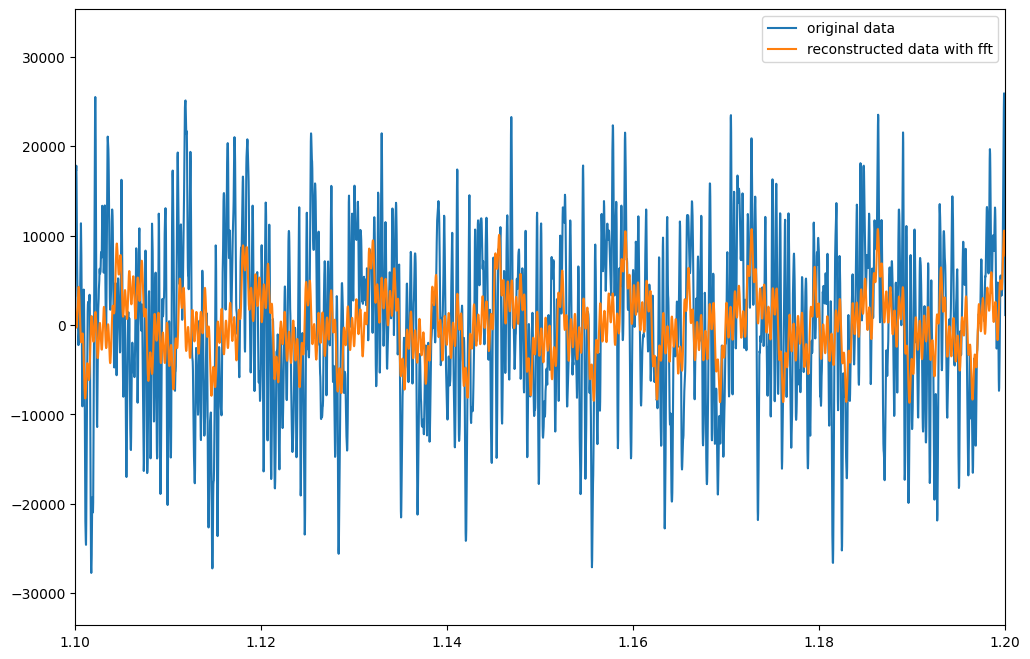

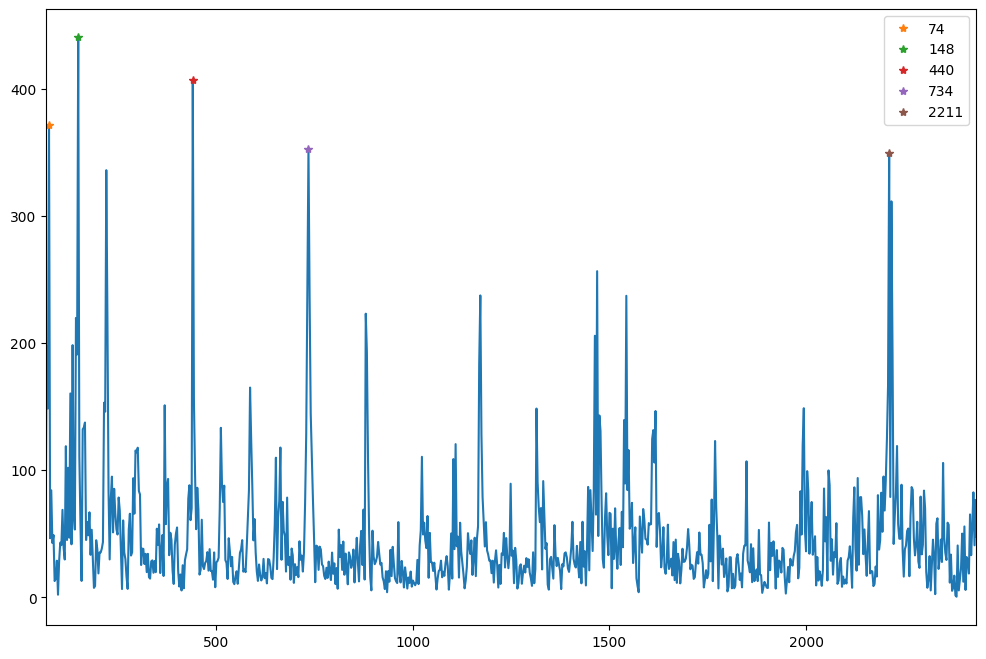

In [32]:



start = 1.05
end = 1.40
dominant_num = 5
x_1, x_recon,result,X_1,X_recon =  fft_st_ed(start,end,mono,data[0],dominant_num)
print(min(result))
print(result)
plot_fft_rec(x_1,x_recon,start,end,[1.1,1.2])
plot_fft_frec(x_1,X_1,X_recon,result,data[0])




Audio(x_recon, rate=data[0], autoplay=True)